<a href="https://colab.research.google.com/github/Omkaarr1/MEDICAL-IMAGE-CLASSIFICATION-FOR-DISEASE-DIAGNOSIS-USING-CONVOLUTIONAL-NEURAL-NETWORKS/blob/main/tuberculosis_detection_by_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import glob
from keras.preprocessing.image import ImageDataGenerator as idg
from keras.layers import Dropout
import math
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D,Dropout, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import sklearn

import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir


%matplotlib inline

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import sys
import keras
keras.__version__
from keras import layers
from keras import models
from keras import optimizers
from keras.optimizers import SGD
%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
import sklearn
import cv2

import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from os import listdir
tf.keras.preprocessing.image.load_img

<function keras.src.utils.image_utils.load_img(path, grayscale=False, color_mode='rgb', target_size=None, interpolation='nearest', keep_aspect_ratio=False)>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.4 MB/s eta 0:00:00


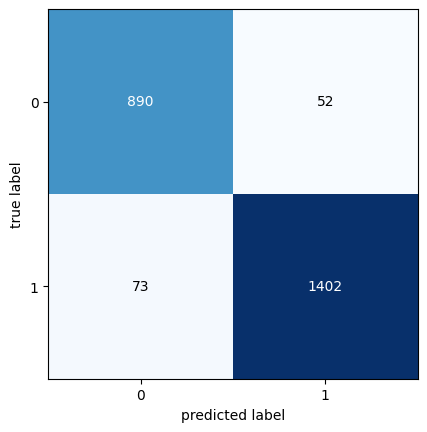

In [4]:
!pip install mlxtend # install the missing module
from mlxtend.plotting import plot_confusion_matrix # import after installing the module
import matplotlib.pyplot as plt
import numpy as np

cm = np.array([[890,52 ],
                   [73,1402]])

fig, ax = plot_confusion_matrix(conf_mat=cm) # Assuming you meant to use cm here
plt.show()

In [5]:
base_dir= "/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"
os.listdir(base_dir)

['README.md.txt',
 'Normal',
 'Tuberculosis.metadata.xlsx',
 'Tuberculosis',
 'Normal.metadata.xlsx']

In [6]:
tuberculosis_data= "/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis"
print("tuberculosis images :\n" ,os.listdir(tuberculosis_data)[:5])

normal_data= "/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal"
print("\nnormal images :\n" ,os.listdir(normal_data)[:5])

tuberculosis images :
 ['Tuberculosis-681.png', 'Tuberculosis-343.png', 'Tuberculosis-81.png', 'Tuberculosis-104.png', 'Tuberculosis-144.png']

normal images :
 ['Normal-1914.png', 'Normal-1126.png', 'Normal-2793.png', 'Normal-2775.png', 'Normal-2233.png']


In [7]:
print("no. of tuberculosis images :" ,len(os.listdir(tuberculosis_data)))
print("\nno. of normal images :" ,len(os.listdir(normal_data)))

no. of tuberculosis images : 700

no. of normal images : 3500


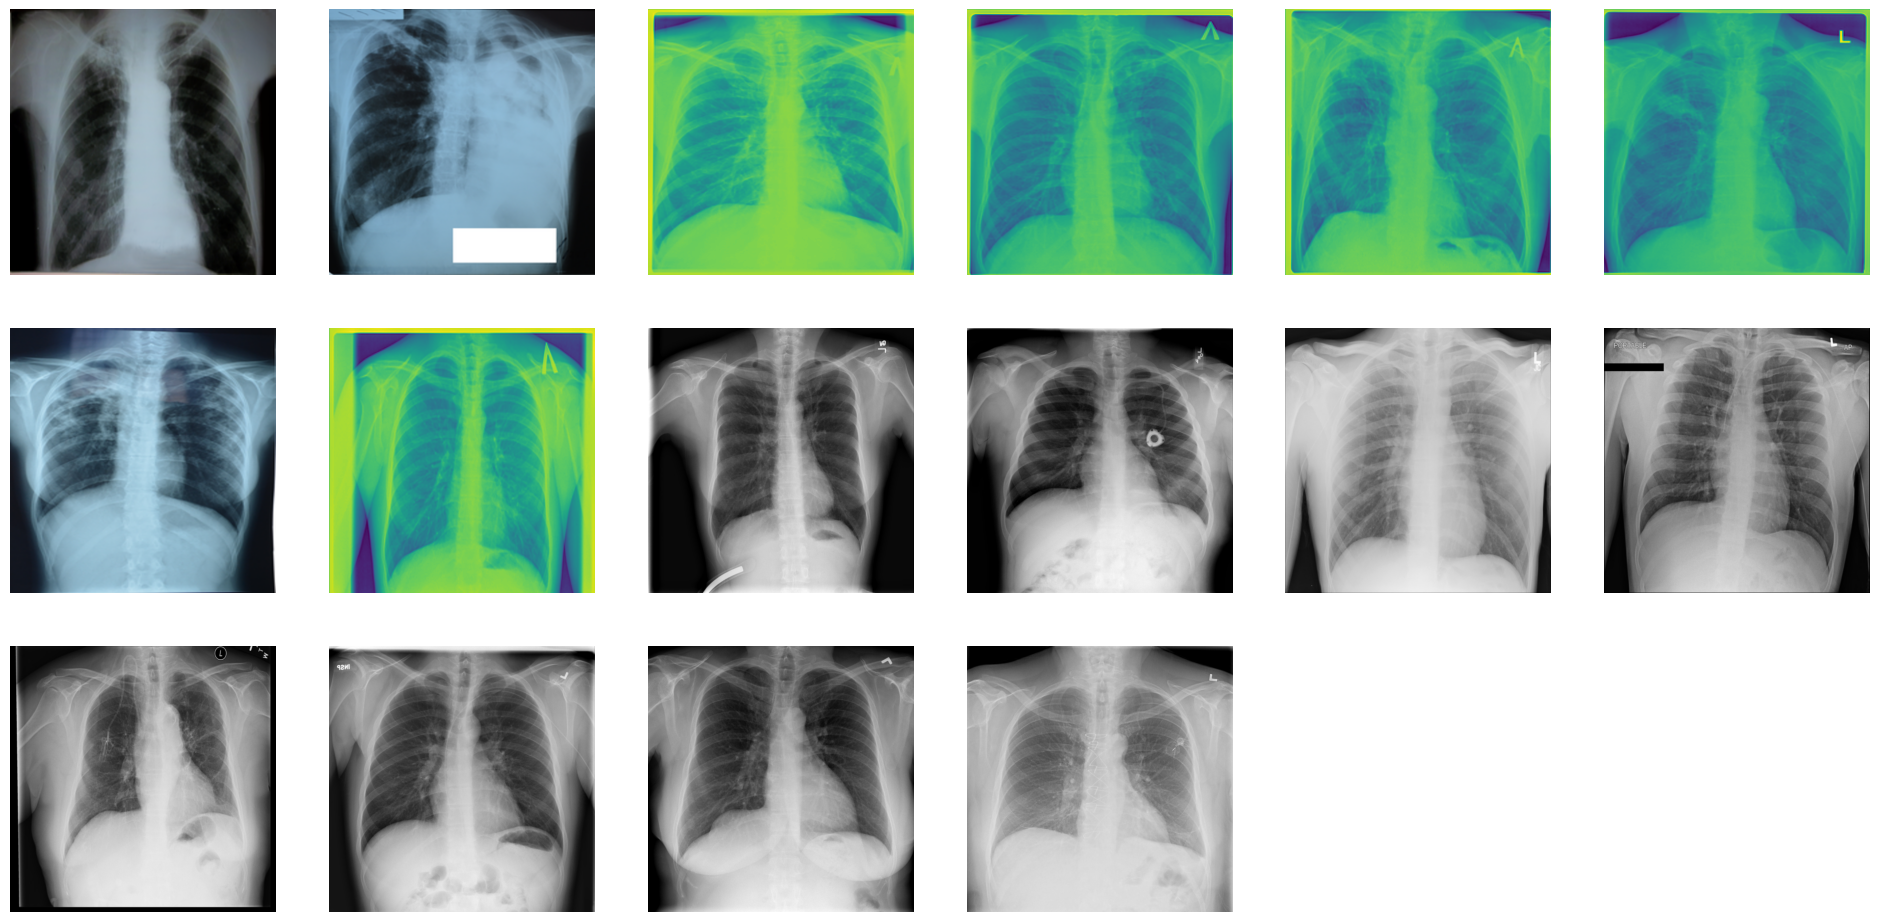

In [8]:
nrows= 5
ncols= 6
pic_index= 0

fig= plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8

tuberculosis_img = [os.path.join(tuberculosis_data, image) for image in os.listdir(tuberculosis_data)[pic_index-8:pic_index]]
normal_img = [os.path.join(normal_data, image) for image in os.listdir(normal_data)[pic_index-8:pic_index]]

for i, image_path in enumerate(tuberculosis_img+normal_img):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(image_path)
    plt.imshow(img)

plt.show()

In [9]:
# generating training data
print("training data :")
train_datagen= ImageDataGenerator(rescale=1/255, zoom_range=0.2,  width_shift_range= 0.2, height_shift_range=0.2, shear_range=0.2,
                                   horizontal_flip=True,  validation_split = 0.2)

train_data = train_datagen.flow_from_directory(base_dir,
                                              target_size= (64,64),
                                              class_mode= "binary",
                                              batch_size=32,
                                              subset= "training"
                                              )

# genarating validation data
print("\nvalidation data :")
val_datagen= ImageDataGenerator(rescale= 1/255, validation_split= 0.2)

val_data= train_datagen.flow_from_directory(base_dir,
                                              target_size= (64,64),
                                              class_mode= "binary",
                                              batch_size=32,
                                              shuffle= False,
                                              subset= "validation"
                                              )

training data :
Found 3360 images belonging to 2 classes.

validation data :
Found 840 images belonging to 2 classes.


In [10]:
#1 model
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64,64,3))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (9, 9), activation='relu',input_shape=(64,64,3))) #secondlayer
model.add(layers.MaxPooling2D((4, 4)))

model.add(layers.Flatten())


model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 64))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        165952    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

In [11]:
model.fit(train_data, validation_data=val_data, epochs=15)

Epoch 1/15
105/105 [==============================] - 38s 350ms/step - loss: 0.4254 - accuracy: 0.8315 - val_loss: 0.3803 - val_accuracy: 0.8595
Epoch 2/15
105/105 [==============================] - 37s 356ms/step - loss: 0.2937 - accuracy: 0.9036 - val_loss: 0.3747 - val_accuracy: 0.8607
Epoch 3/15
105/105 [==============================] - 38s 363ms/step - loss: 0.2408 - accuracy: 0.9179 - val_loss: 0.3322 - val_accuracy: 0.8607
Epoch 4/15
105/105 [==============================] - 38s 358ms/step - loss: 0.1989 - accuracy: 0.9280 - val_loss: 0.2869 - val_accuracy: 0.8643
Epoch 5/15
105/105 [==============================] - 38s 363ms/step - loss: 0.1943 - accuracy: 0.9253 - val_loss: 0.3780 - val_accuracy: 0.8607
Epoch 6/15
105/105 [==============================] - 39s 368ms/step - loss: 0.1894 - accuracy: 0.9256 - val_loss: 0.2639 - val_accuracy: 0.8571
Epoch 7/15
105/105 [==============================] - 35s 337ms/step - loss: 0.1728 - accuracy: 0.9363 - val_loss: 0.2398 - val_ac

26/26 [==============================] - 7s 253ms/step


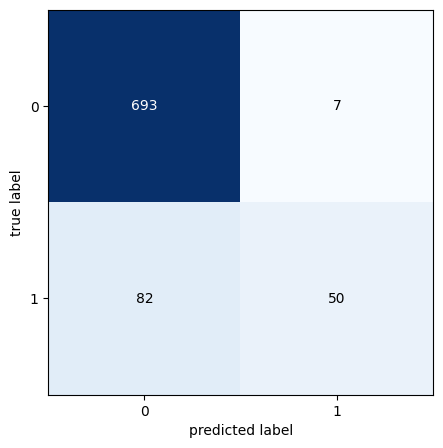

Accuracy: 0.8930
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       700
           1       0.88      0.38      0.53       132

    accuracy                           0.89       832
   macro avg       0.89      0.68      0.73       832
weighted avg       0.89      0.89      0.87       832



In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

# Make predictions on the validation data
val_steps = val_data.samples // val_data.batch_size  # Number of steps to cover validation data
predictions = model.predict(val_data, steps=val_steps, verbose=1)

# Convert predictions to class labels (0 or 1) based on a threshold of 0.5
predicted_classes = (predictions > 0.5).astype("int32").flatten()

# Get the true classes
true_classes = val_data.classes[:len(predicted_classes)]  # Ensuring the shape matches the predictions

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5))
plt.show()

# Print accuracy and classification report
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))


**Second Model**

In [14]:
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(64,64,3))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64,64,3))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (6, 6), activation='relu',input_shape=(64,64,3))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (6, 6), activation='relu',padding="same",input_shape=(64,64,3))) #secondlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())


model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 64))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 32)          36896     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 32)         

In [15]:
model.fit(train_data, validation_data=val_data, epochs=15)

Epoch 1/15
105/105 [==============================] - 36s 331ms/step - loss: 0.4828 - accuracy: 0.8333 - val_loss: 0.4385 - val_accuracy: 0.8333
Epoch 2/15
105/105 [==============================] - 34s 327ms/step - loss: 0.3602 - accuracy: 0.8336 - val_loss: 0.3972 - val_accuracy: 0.8488
Epoch 3/15
105/105 [==============================] - 34s 325ms/step - loss: 0.2685 - accuracy: 0.9143 - val_loss: 0.3497 - val_accuracy: 0.8690
Epoch 4/15
105/105 [==============================] - 34s 326ms/step - loss: 0.2445 - accuracy: 0.9125 - val_loss: 0.3293 - val_accuracy: 0.8595
Epoch 5/15
105/105 [==============================] - 35s 331ms/step - loss: 0.2279 - accuracy: 0.9134 - val_loss: 0.2716 - val_accuracy: 0.8655
Epoch 6/15
105/105 [==============================] - 34s 326ms/step - loss: 0.1950 - accuracy: 0.9235 - val_loss: 0.2767 - val_accuracy: 0.8655
Epoch 7/15
105/105 [==============================] - 34s 326ms/step - loss: 0.1842 - accuracy: 0.9232 - val_loss: 0.3240 - val_ac

26/26 [==============================] - 7s 251ms/step


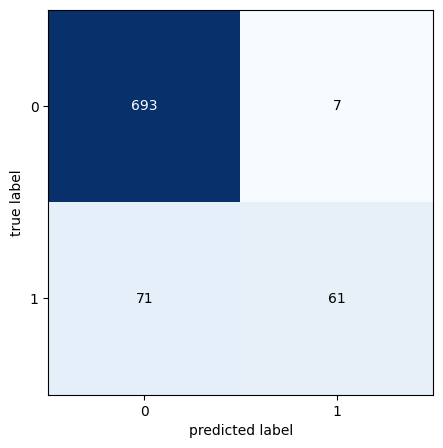

Accuracy: 0.9062
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       700
           1       0.90      0.46      0.61       132

    accuracy                           0.91       832
   macro avg       0.90      0.73      0.78       832
weighted avg       0.91      0.91      0.89       832



In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

# Make predictions on the validation data
val_steps = val_data.samples // val_data.batch_size  # Number of steps to cover validation data
predictions = model.predict(val_data, steps=val_steps, verbose=1)

# Convert predictions to class labels (0 or 1) based on a threshold of 0.5
predicted_classes = (predictions > 0.5).astype("int32").flatten()

# Get the true classes
true_classes = val_data.classes[:len(predicted_classes)]  # Ensuring the shape matches the predictions

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5))
plt.show()

# Print accuracy and classification report
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))


Epoch 1/15
105/105 [==============================] - 34s 328ms/step - loss: 0.1928 - accuracy: 0.9372 - val_loss: 0.3807 - val_accuracy: 0.9024
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


105/105 [==============================] - 34s 323ms/step - loss: 0.3055 - accuracy: 0.8687 - val_loss: 0.2768 - val_accuracy: 0.8738
Epoch 3/15
105/105 [==============================] - 34s 321ms/step - loss: 0.2569 - accuracy: 0.9006 - val_loss: 0.3276 - val_accuracy: 0.8500
Epoch 4/15
105/105 [==============================] - 34s 329ms/step - loss: 0.1998 - accuracy: 0.9161 - val_loss: 0.2535 - val_accuracy: 0.9083
Epoch 5/15
105/105 [==============================] - 34s 328ms/step - loss: 0.1723 - accuracy: 0.9381 - val_loss: 0.2188 - val_accuracy: 0.8964
Epoch 6/15
105/105 [==============================] - 34s 326ms/step - loss: 0.1614 - accuracy: 0.9360 - val_loss: 0.1990 - val_accuracy: 0.9190
Epoch 7/15
105/105 [==============================] - 34s 326ms/step - loss: 0.1609 - accuracy: 0.9405 - val_loss: 0.3151 - val_accuracy: 0.8726
Epoch 8/15
105/105 [==============================] - 34s 325ms/step - loss: 0.1489 - accuracy: 0.9423 - val_loss: 0.2231 - val_accuracy: 0.8

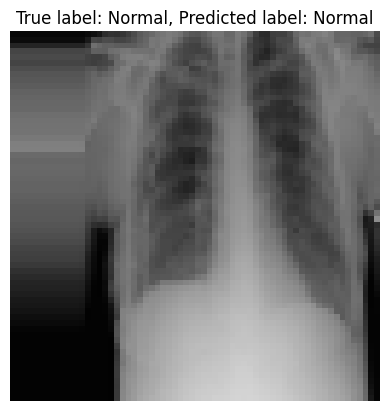

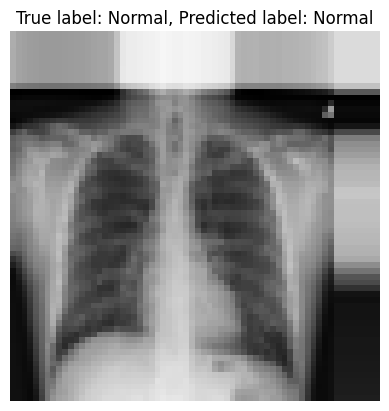

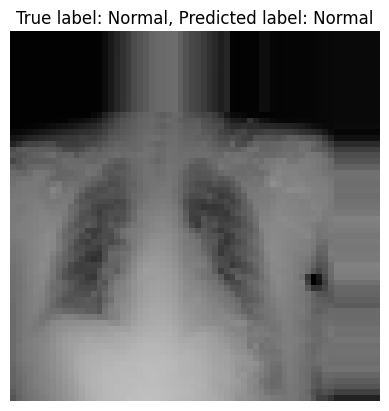

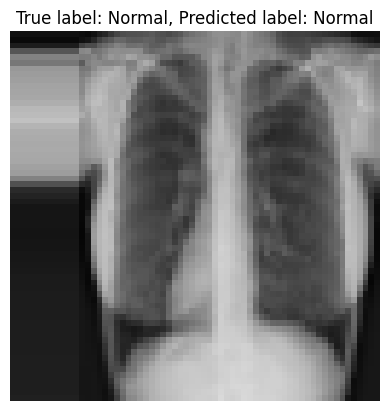

In [17]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

# Define the checkpoint to save the best model
checkpoint = ModelCheckpoint('Tuberculosis_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# Training the model with the checkpoint
model.fit(train_data, validation_data=val_data, epochs=15, callbacks=[checkpoint])

# Load the best saved model
best_model = load_model('Tuberculosis_model.h5')

# Get the class indices to map labels to class names
class_indices = val_data.class_indices
class_names = {v: k for k, v in class_indices.items()}

# Get a batch of images and labels from the validation data
val_images, val_labels = val_data.next()

# Make predictions on the images
predictions = best_model.predict(val_images)
predicted_classes = (predictions > 0.5).astype("int32").flatten()

# Display 4 images with their true and predicted labels
import matplotlib.pyplot as plt

for i in range(4):
    image = val_images[i]
    true_label = val_labels[i]
    predicted_label = predicted_classes[i]
    true_label_name = class_names[int(true_label)]
    predicted_label_name = class_names[int(predicted_label)]

    plt.imshow(image)
    plt.title(f"True label: {true_label_name}, Predicted label: {predicted_label_name}")
    plt.axis('off')
    plt.show()
